### Problem Statement 

### The objective of the diabetes dataset is to predict whether a person has diabetes or not

### Step 1:Importing the necessary libraries

In [1]:
import numpy as np   #numerical python
import pandas as pd   #loading,processing and analysis of data
import matplotlib.pyplot as plt   #graphical visulization
import seaborn as sns   #graphical visulization with corr,trends,patterns

import warnings
warnings.filterwarnings('ignore')

### Step 2:Load the Dataset

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Step 3:Exploratory Data Analysis(EDA)

### Data checking

In [4]:
df.shape

(768, 9)

In [5]:
df.size

6912

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.describe() #summary of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#from above we draw insights that minimum values of Glucose,Blood Pressure,Skin Thickness and Insulin is 0 
#which is not possible for any person
#Hence we need to find mean(not mode) for these columns of numerical data

### Data Cleaning

In [10]:
#Check and drop Duplicates
df=df.drop_duplicates()
df.shape

(768, 9)

In [11]:
#Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### Step 4:Data Visualization

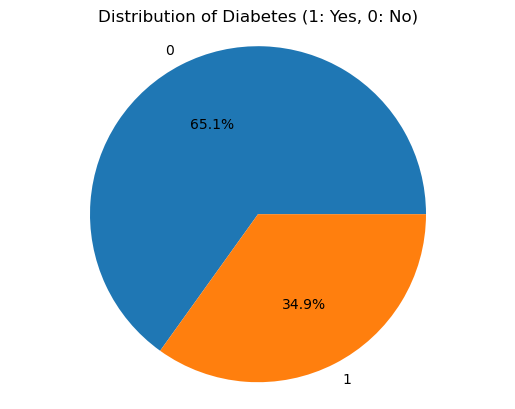

In [16]:
value_counts=df['Outcome'].value_counts()   #series
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribution of Diabetes (1: Yes, 0: No)')
plt.show()

#data is imbalanced 
#34.9% => 268 people have diabetes
#65.1 =>  500 people have no diabetes

<Axes: xlabel='Age', ylabel='BloodPressure'>

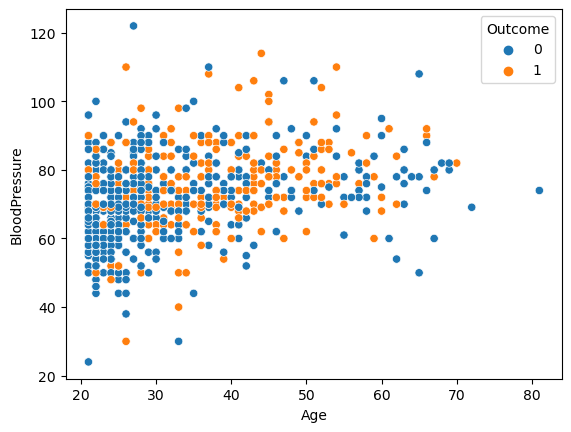

In [17]:
sns.scatterplot(data=df,x='Age',y='BloodPressure',hue='Outcome')

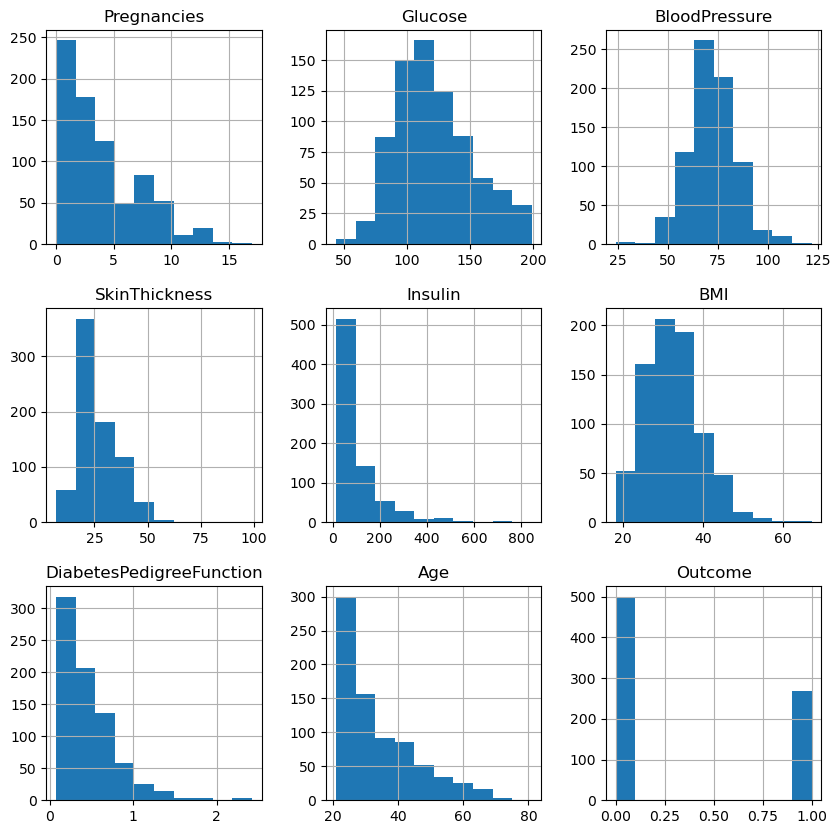

In [18]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

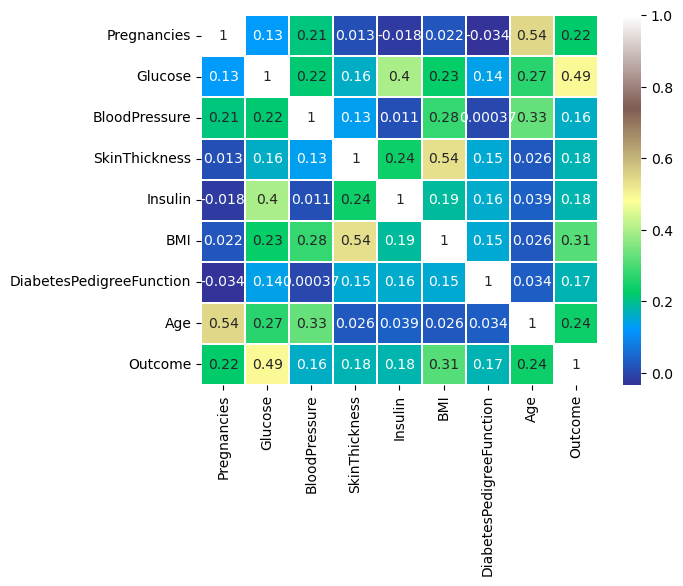

In [19]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='terrain',linewidths=0.1)

### From above it is clear that features such as BloodPressure and DiabetesPedigreeFunction contribute less to the values of the Outcome label.Hence we can remove them from dataset

In [20]:
df.drop(['BloodPressure','DiabetesPedigreeFunction'],axis='columns',inplace=True)

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

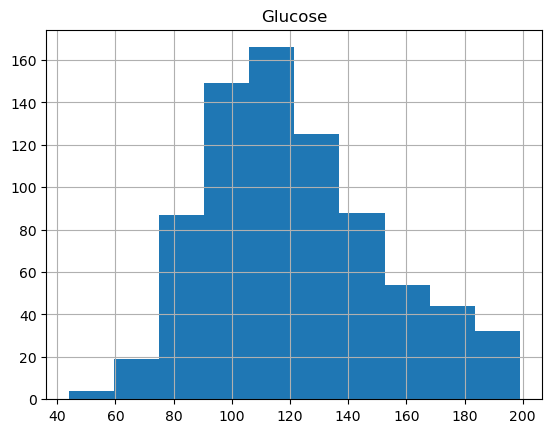

In [21]:
df.hist(column='Glucose')

In [22]:
#skewed dataset means that data is more oriented towards the higher side

<Axes: xlabel='Age'>

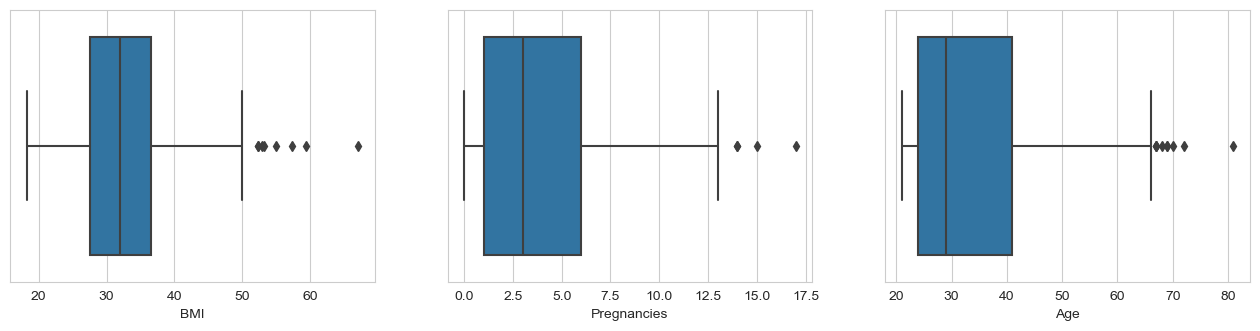

In [23]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df['BMI'],data=df)
plt.subplot(3,3,2)
sns.boxplot(x=df['Pregnancies'],data=df)
plt.subplot(3,3,3)
sns.boxplot(x=df['Age'],data=df)

In [24]:
columns_to_convert=['Pregnancies', 'Age']
df[columns_to_convert]=df[columns_to_convert].astype(float)

### Step 5:Splitting Data into X and Y (predictors and outcome)

In [25]:
X=df.drop('Outcome',axis=1)
print(X.head())
print(X.shape)

   Pregnancies  Glucose  SkinThickness     Insulin   BMI   Age
0          6.0    148.0      35.000000   79.799479  33.6  50.0
1          1.0     85.0      29.000000   79.799479  26.6  31.0
2          8.0    183.0      20.536458   79.799479  23.3  32.0
3          1.0     89.0      23.000000   94.000000  28.1  21.0
4          0.0    137.0      35.000000  168.000000  43.1  33.0
(768, 6)


In [26]:
Y=df['Outcome']
Y.shape

(768,)

### Step 6:Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X=df.drop('Outcome', axis=1)  # Select features without the target variable
X_scaled=scaler1.fit_transform(X)

X=pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age
0,0.639947,0.865276,0.872057,-0.417768,0.167255,1.425995
1,-0.844885,-1.205989,0.248678,-0.417768,-0.851535,-0.190672
2,1.233880,2.015979,-0.630654,-0.417768,-1.331821,-0.105584
3,-0.844885,-1.074480,-0.374700,-0.265107,-0.633222,-1.041549
4,-1.141852,0.503626,0.872057,0.530423,1.549899,-0.020496


### Step 7:Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.31,random_state=31)

In [29]:
x_train.shape,y_train.shape

((529, 6), (529,))

In [30]:
x_test.shape,y_test.shape

((239, 6), (239,))

In [31]:
x_train.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age
377,-0.844885,-1.140235,1.079850,-0.469364,0.691205,-0.956462
605,-0.844885,0.076222,0.560368,-0.417768,0.487447,-1.041549
749,0.639947,1.325557,-0.630654,-0.417768,-1.186280,1.425995
482,0.046014,-1.205989,-0.478597,-0.748875,-0.676885,-0.445935
455,3.015679,1.752961,0.352575,-0.417768,0.167255,0.404942


In [32]:
x_train['Glucose'].mean()

-0.01173918619782223

### Step 8:Building the Classification Algorithm

In [33]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
lr=LogisticRegression()

# Train the model on the training data
lr.fit(x_train, y_train)

# Predict on the testing data
y_pred_lr=lr.predict(x_test)

In [34]:
# KNN ALGORITHM
from sklearn.neighbors import KNeighborsClassifier

In [35]:
err_rate = []

for i in range(1,32,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    err_rate.append(np.mean(pred_i != y_test))

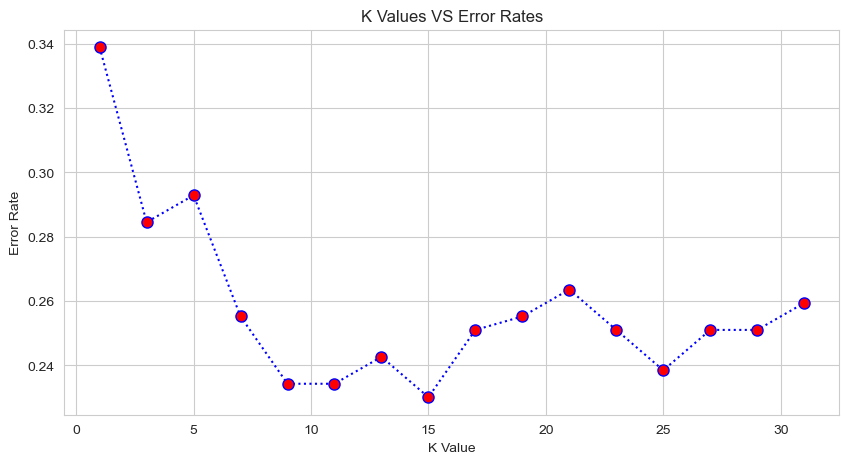

In [36]:
plt.figure(figsize=(10,5))
plt.plot(range(1,32,2),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title('K Values VS Error Rates')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

In [37]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X,Y)
y_pred_knn=knn.predict(x_test)

In [38]:
# NAIVE BAYES CLASSIFIER ALGORITHM
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes=GaussianNB()

# Train the model on the training data
naive_bayes.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_nb=naive_bayes.predict(x_test)

In [39]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,min_samples_split=7,random_state=0)

# Train the model on the training data
decision_tree.fit(x_train,y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree.predict(x_test)

In [40]:
y_pred_dt

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

[Text(0.5, 0.875, 'x[1] <= 0.191\ngini = 0.45\nsamples = 529\nvalue = [348, 181]'),
 Text(0.25, 0.625, 'x[4] <= -0.793\ngini = 0.312\nsamples = 341\nvalue = [275, 66]'),
 Text(0.125, 0.375, 'x[3] <= -0.754\ngini = 0.021\nsamples = 96\nvalue = [95, 1]'),
 Text(0.0625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.375, 0.375, 'x[5] <= -0.403\ngini = 0.39\nsamples = 245\nvalue = [180, 65]'),
 Text(0.3125, 0.125, 'gini = 0.23\nsamples = 128\nvalue = [111, 17]'),
 Text(0.4375, 0.125, 'gini = 0.484\nsamples = 117\nvalue = [69, 48]'),
 Text(0.75, 0.625, 'x[4] <= -0.364\ngini = 0.475\nsamples = 188\nvalue = [73, 115]'),
 Text(0.625, 0.375, 'x[2] <= 0.197\ngini = 0.395\nsamples = 48\nvalue = [35, 13]'),
 Text(0.5625, 0.125, 'gini = 0.32\nsamples = 40\nvalue = [32, 8]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.875, 0.375, 'x[1] <= 1.441\ngini = 0.396\nsamples = 140\nvalue = [38, 1

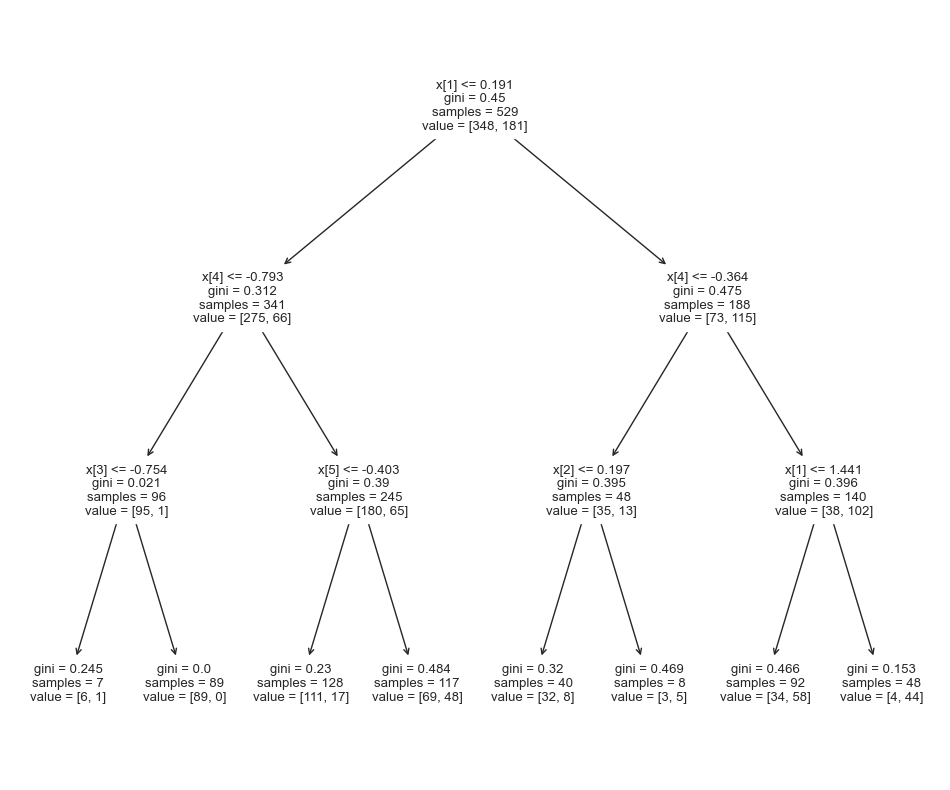

In [41]:
plt.figure(figsize=(12,10))
from sklearn import tree
tree.plot_tree(decision_tree.fit(x_train,y_train))

In [42]:
from sklearn.model_selection import RandomizedSearchCV

param_dist={
    'n_estimators':[int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],   
    'max_depth':[2,4],                 
    'min_samples_split':[2,5],        
    'min_samples_leaf':[1,2],         
    'max_features':['auto', 'sqrt', 'log2'],   
    'bootstrap':[True, False],
}

In [43]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest=RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
random_search=RandomizedSearchCV(
    random_forest,param_distributions=param_dist,n_iter=20,cv=5,scoring='f1',n_jobs=-1
)

random_search.fit(x_train, y_train)
print("Best Hyperparameters: ",random_search.best_params_)

Best Hyperparameters:  {'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 4, 'bootstrap': True}


In [45]:
best_model=random_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=2,
                       n_estimators=30, random_state=42)


In [46]:
# Train the model on the training data
random_forest.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_rf =best_model.predict(x_test)

### Comparision of Classification Algorithms

In [47]:
scores_dict={}

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [49]:
#Logistic Regression
print("Classification Report is:\n",classification_report(y_test,y_pred_lr))
print("\n F1:\n",f1_score(y_test,y_pred_lr)*100)
print("\n Precision score is:\n",precision_score(y_test,y_pred_lr)*100)
print("\n Recall score is:\n",recall_score(y_test,y_pred_lr)*100)
scores_dict['Logistic Regression']=f1_score(y_test,y_pred_lr)*100

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       152
           1       0.72      0.64      0.68        87

    accuracy                           0.78       239
   macro avg       0.76      0.75      0.75       239
weighted avg       0.77      0.78      0.78       239


 F1:
 67.87878787878789

 Precision score is:
 71.7948717948718

 Recall score is:
 64.36781609195403


In [50]:
#KNN Algorithm
print("Classification Report is:\n",classification_report(y_test,y_pred_knn))
print("\n F1:\n",f1_score(y_test,y_pred_knn)*100)
print("\n Precision score is:\n",precision_score(y_test,y_pred_knn)*100)
print("\n Recall score is:\n",recall_score(y_test,y_pred_knn)*100)
scores_dict['KNN']=f1_score(y_test,y_pred_knn)*100

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       152
           1       0.70      0.68      0.69        87

    accuracy                           0.78       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.78      0.78      0.78       239


 F1:
 69.00584795321637

 Precision score is:
 70.23809523809523

 Recall score is:
 67.81609195402298


In [51]:
#Naive Bayes Algorithm
print("Classification Report is:\n",classification_report(y_test,y_pred_nb))
print("\n F1:\n",f1_score(y_test,y_pred_nb)*100)
print("\n Precision score is:\n",precision_score(y_test,y_pred_nb)*100)
print("\n Recall score is:\n",recall_score(y_test,y_pred_nb)*100)
scores_dict['Naive Bayes']=f1_score(y_test,y_pred_nb)*100

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       152
           1       0.63      0.62      0.62        87

    accuracy                           0.73       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.73      0.73      0.73       239


 F1:
 62.42774566473989

 Precision score is:
 62.7906976744186

 Recall score is:
 62.06896551724138


In [52]:
#Decision Tree Algorithm
print("Classification Report is:\n",classification_report(y_test,y_pred_dt))
print("\n F1:\n",f1_score(y_test,y_pred_dt)*100)
print("\n Precision score is:\n",precision_score(y_test,y_pred_dt)*100)
print("\n Recall score is:\n",recall_score(y_test,y_pred_dt)*100)
scores_dict['Decision Tree']=f1_score(y_test,y_pred_dt)*100

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       152
           1       0.66      0.56      0.61        87

    accuracy                           0.74       239
   macro avg       0.72      0.70      0.70       239
weighted avg       0.73      0.74      0.73       239


 F1:
 60.86956521739131

 Precision score is:
 66.21621621621621

 Recall score is:
 56.32183908045977


In [53]:
#Random Forest Algorithm
print("Classification Report is:\n",classification_report(y_test,y_pred_rf))
print("\n F1:\n",f1_score(y_test,y_pred_rf)*100)
print("\n Precision score is:\n",precision_score(y_test,y_pred_rf)*100)
print("\n Recall score is:\n",recall_score(y_test,y_pred_rf)*100)
scores_dict['Random Forest']=f1_score(y_test,y_pred_rf)*100

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       152
           1       0.70      0.61      0.65        87

    accuracy                           0.76       239
   macro avg       0.74      0.73      0.73       239
weighted avg       0.76      0.76      0.76       239


 F1:
 65.03067484662576

 Precision score is:
 69.73684210526315

 Recall score is:
 60.91954022988506


###
Here f1_score is a better metric for efficiency of the learning model because:
+ Imbalanced Datasets: In many real-world scenarios, class distribution can be imbalanced, where one class has significantly fewer instances than the other. In such cases, accuracy can be misleading, as a classifier might achieve high accuracy by simply predicting the majority class.
+ Trade-off Between Precision and Recall: Precision and recall are two important aspects of a classifier's performance. Precision focuses on the proportion of true positives among the predicted positives, while recall focuses on the proportion of true positives among the actual positives. The F1 score balances these two metrics and provides a single value that considers both false positives and false negatives.

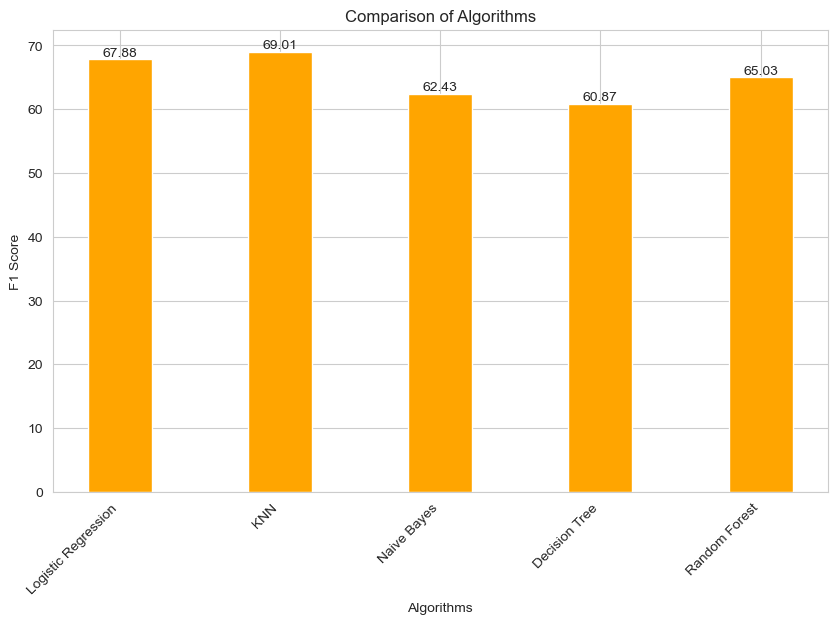

In [54]:

x = list(scores_dict.keys())
y = list(scores_dict.values())

# Create a bar plot
plt.figure(figsize=(10, 6))  
plt.bar(x, y, width=0.4, color='orange')  

title_str = 'Comparison of Algorithms'  
x_label = 'Algorithms'
y_label = 'F1 Score'

plt.title(title_str)  
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks(rotation=45, ha='right')

# Display the F1 scores on top of the bars
for i, v in enumerate(y):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, fontweight='roman')

#plt.tight_layout()
plt.show()

### From the above plot,it is observed that the KNN Algorithm is the best classification algorithm that can be used to predict the presence or absence of diabetes on the basis of this dataset.

In [55]:
import pickle

#Dumping model object(serialization)
pickle.dump(knn,open("model.pkl","wb"))

model=pickle.load(open("model.pkl","rb"))

In [56]:
y_pred_knn

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [57]:
input_data = (1.0,85.0,29.0,79.79,26.6,31.0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler1.transform(input_data_reshaped)
print(std_data)
print("Mean:", scaler1.mean_)
print("Scale (Standard Deviation):", scaler1.scale_)

prediction = knn.predict(std_data)
print(prediction)

[[-0.84488505 -1.20598931  0.2486783  -0.41787005 -0.85153454 -0.19067191]]
Mean: [  3.84505208 121.68160502  26.60647922 118.66016303  32.45080516
  33.24088542]
Scale (Standard Deviation): [ 3.36738361 30.41619408  9.62496833 93.01973872  6.87089589 11.75257265]
[0]


In [58]:
# import pickle

# # Load the StandardScaler from the pickled file
# with open("scaler.pkl", "rb") as scaler_file:
#     scaler = pickle.load(scaler_file)

# # Print the scaler object and its properties
# print("Scaler Object:", scaler)
# print("Mean:", scaler.mean_)
# print("Scale (Standard Deviation):", scaler.scale_)

In [59]:
import pickle

# After fitting the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler1, scaler_file)